In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\BHUMIKA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Generating Random Data
We will be generating a set of data using the make_blobs class.

Input these parameters into make_blobs:
n_samples: The total number of points equally divided among clusters.
Choose a number from 10-1500
centers: The number of centers to generate, or the fixed center locations.
Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
Choose a number between 0.5-1.5

Save the result to X1 and y1.

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data

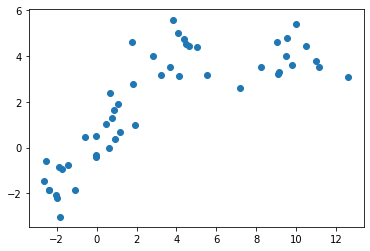

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [4]:
X1

array([[-1.88081418e+00, -8.39056498e-01],
       [ 7.17416049e+00,  2.61994523e+00],
       [ 4.65109895e+00,  4.42448922e+00],
       [ 9.50886780e+00,  4.00014490e+00],
       [-1.09396062e+00, -1.87177963e+00],
       [ 4.07970026e+00,  4.99965201e+00],
       [-2.40169684e+00, -1.85442509e+00],
       [ 1.04661412e+01,  4.46554174e+00],
       [ 9.05243710e-01,  3.70643653e-01],
       [ 2.81223490e+00,  3.99792855e+00],
       [ 8.72760235e-01,  1.63666224e+00],
       [ 6.62847512e-01,  2.36799385e+00],
       [ 4.11058651e+00,  3.13615788e+00],
       [ 1.76241028e+00,  4.64013158e+00],
       [ 3.24952920e+00,  3.17015097e+00],
       [ 5.53129944e+00,  3.15861777e+00],
       [-2.39491437e+00, -1.84472817e+00],
       [-2.00809020e+00, -2.22610945e+00],
       [ 3.68503468e+00,  3.52276229e+00],
       [-5.35108768e-02,  5.09850009e-01],
       [ 6.12453613e-01, -1.17603848e-02],
       [ 1.09715466e+01,  3.77712696e+00],
       [ 9.14697241e+00,  3.30629584e+00],
       [ 1.

In [6]:
y1

array([1, 0, 0, 3, 1, 0, 1, 3, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 3,
       3, 3, 3, 3, 3, 1, 2, 0, 2, 3, 1, 2, 0, 1, 1, 3, 2, 2, 2, 0, 1, 1,
       1, 3, 1, 0, 2, 3])

Agglomerative Clustering
We will start by clustering the random data points we just created.

The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4
linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
Value will be: 'complete'
Note: It is recommended you try everything with 'average' as well

Save the result to a variable called agglom

In [7]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [8]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

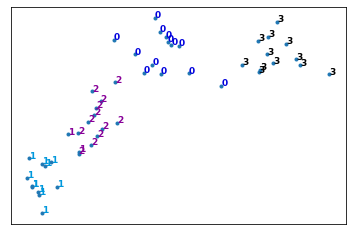

In [9]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [14]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.71721503 0.74607867 ... 0.8352491  0.37543563 0.95473204]
 [0.71721503 0.         0.26692514 ... 0.4103794  0.40764408 0.26031716]
 [0.74607867 0.26692514 0.         ... 0.14729778 0.37232034 0.28810567]
 ...
 [0.8352491  0.4103794  0.14729778 ... 0.         0.46209604 0.36163574]
 [0.37543563 0.40764408 0.37232034 ... 0.46209604 0.         0.60676774]
 [0.95473204 0.26031716 0.28810567 ... 0.36163574 0.60676774 0.        ]]


In [15]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\BHUMIKA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


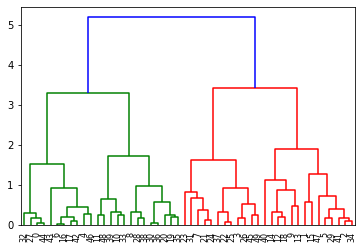

In [16]:
dendro = hierarchy.dendrogram(Z)